In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

save_dir = '/content/drive/Shareddrives/TuriLab/Data/PTSD_project/!analysis/saveFolder/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from os.path import join

import pandas as pd
import seaborn as sns
sns.set_context('talk')

In [ ]:
worksheet = gc.open('ptsd11_mice_clean_freezing_data3').sheet1

# get_all_values gives a list of rows.
data = worksheet.get_all_values()
# print(data)

# Convert to a DataFrame and render.
df = pd.DataFrame.from_records(data)
df.columns = df.iloc[0]
df.drop(df.index[0], inplace=True)
df.reset_index(inplace=True, drop=True)
df.set_index('cohort_id', inplace=True)
df

,mean_freezing,day,context
cohort_id,,,
ptsd11_31-1,27.07,1,C
ptsd11_31-2,0.64,1,C
ptsd11_31-3,1.48,1,C
ptsd11_31-4,7.55,1,C
ptsd11_32-1,9.86,1,C
...,...,...,...
ptsd11_33-4,42.16,10,A
ptsd11_34-1,62.9,10,A
ptsd11_34-2,54.59,10,A


In [ ]:
worksheet = gc.open('PTSD11_workbook').sheet1

# get_all_values gives a list of rows.
data = worksheet.get_all_values()
# print(data)

# Convert to a DataFrame and render.
df_meta = pd.DataFrame.from_records(data)
df_meta.columns = df_meta.iloc[0]
df_meta.drop(df_meta.index[0], inplace=True)
df_meta.drop(labels=['cage', 'Arrival Date', 'Notes',
                     'experimentID'], axis=1,
             inplace=True)
df_meta['cohort'] = 'ptsd11'
df_meta['cohort_id'] = df_meta['cohort'] + '_' + df_meta['mouseID']
df_meta.drop(labels=['mouseID', 'cohort'], axis=1, inplace=True)
df_meta.reset_index(inplace=True, drop=True)

df_meta.set_index('cohort_id', inplace=True)
df_meta

,genotype,sex,condition,DOB
cohort_id,,,,
ptsd11_31-1,wt,Male,ctrl,01-04-2022
ptsd11_31-2,wt,Male,ctrl,01-04-2022
ptsd11_31-3,wt,Male,ctrl,01-04-2022
ptsd11_31-4,wt,Male,ctrl,01-04-2022
ptsd11_32-1,wt,Male,ctrl,01-04-2022
ptsd11_32-2,wt,Male,ctrl,01-04-2022
ptsd11_32-3,wt,Male,ctrl,01-04-2022
ptsd11_32-4,wt,Male,ctrl,01-04-2022
ptsd11_33-1,wt,Male,SEFL,01-04-2022


In [ ]:
df_joined = df.join(df_meta)
df_joined['mean_freezing'] = pd.to_numeric(df_joined['mean_freezing'])
df_joined.head(2)

,mean_freezing,day,context,genotype,sex,condition,DOB
cohort_id,,,,,,,
ptsd11_31-1,27.07,1,C,wt,Male,ctrl,01-04-2022
ptsd11_31-1,0.56,2,A,wt,Male,ctrl,01-04-2022


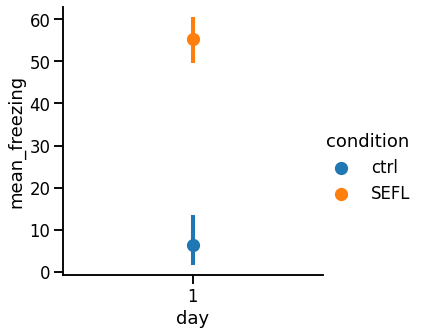

In [ ]:
day1 = df_joined[df_joined['day']=='1']
sns.catplot(data=day1, x='day', y='mean_freezing', hue='condition',
            kind='point')

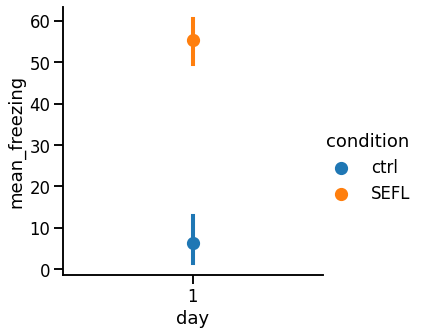

In [ ]:
day2 = df_joined[df_joined['day']=='2']
sns.catplot(data=day1, x='day', y='mean_freezing', hue='condition',
            kind='point')

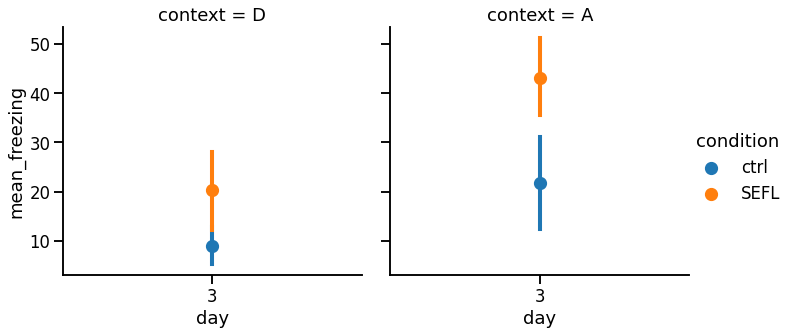

In [ ]:
day3 = df_joined[df_joined['day']=='3']
sns.catplot(data=day3, x='day', y='mean_freezing', hue='condition',
            col='context', kind='point')

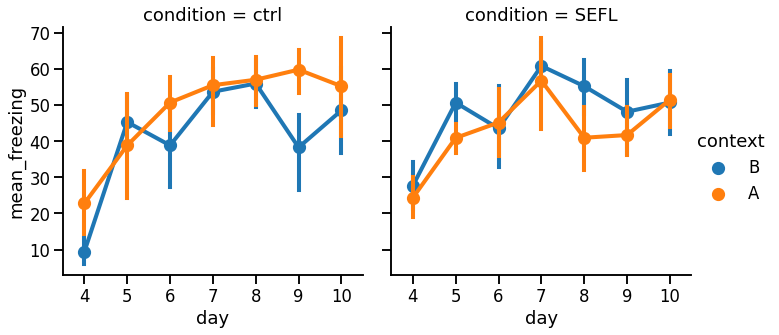

In [ ]:
days = ['4','5','6','7','8','9','10']
df_sep = df_joined[df_joined['day'].isin(days)]
sns.catplot(data=df_sep, x='day', y='mean_freezing', hue='context',
            col='condition', kind='point')